# Exploratory Data Analysis on Global Terrorism Dataset

As a security/defense analyst try to find out the hot zone of a terrorism

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [2]:
data=pd.read_csv("globalterrorism_db.csv", encoding=('ISO-8859-1'),low_memory= False)

In [3]:
data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [5]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [6]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [7]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
data.shape

(181691, 18)

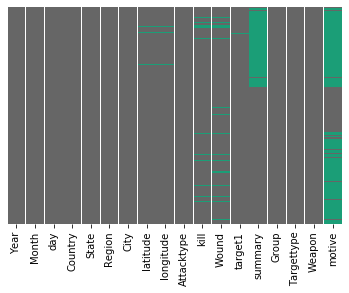

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='Dark2_r')

In [10]:
data.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  kill        171378 non-null  float64
 11  Wound       165380 non-null  float64
 12  target1     181055 non-null  object 
 13  summary     115562 non-null  object 
 14  Group       181691 non-null  object 
 15  Targettype  181691 non-null  object 
 16  Weapon      181691 non-null  object 
 17  motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

In [12]:
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


##        Number of attacks each year

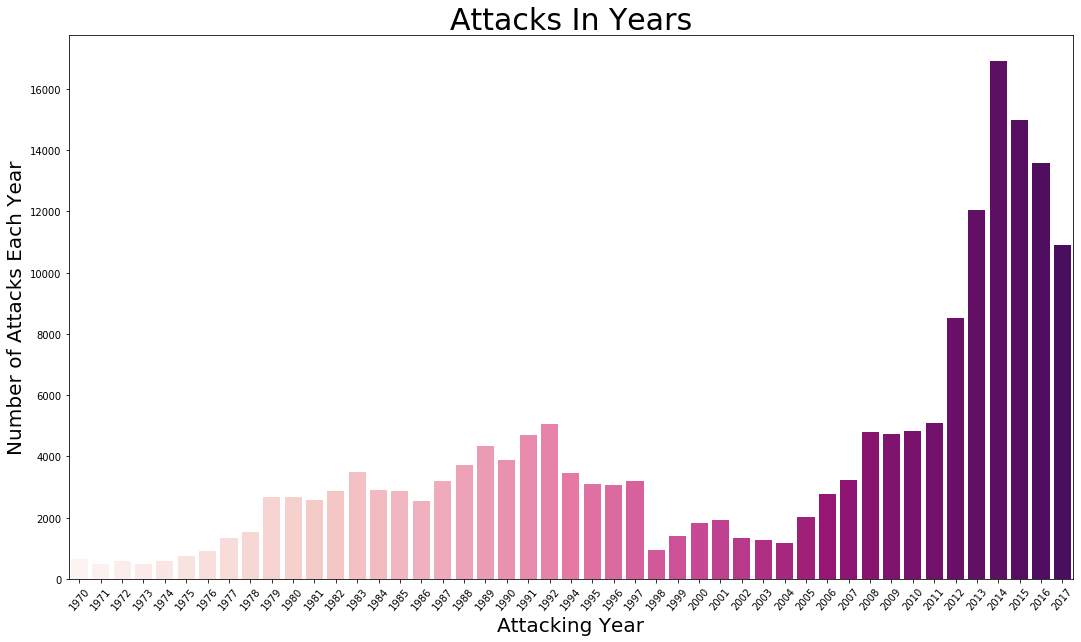

In [13]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "RdPu")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

##     Terrorist Activities by Region in each Year

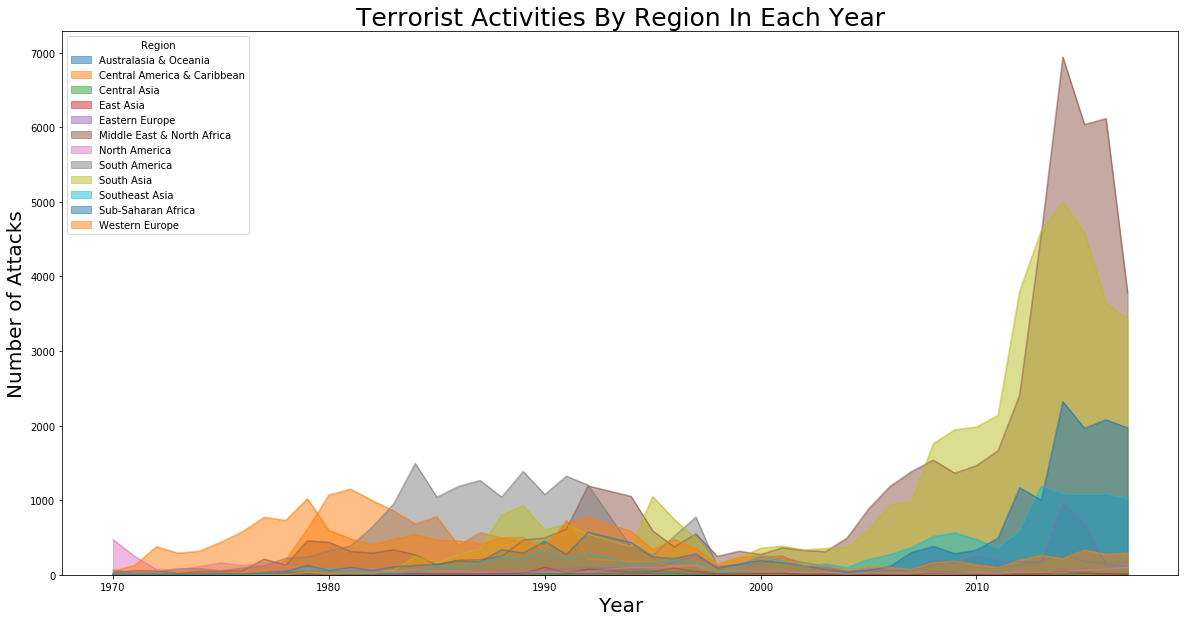

In [14]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()


In [15]:
data.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

## Top Countries affected by Terror Attacks

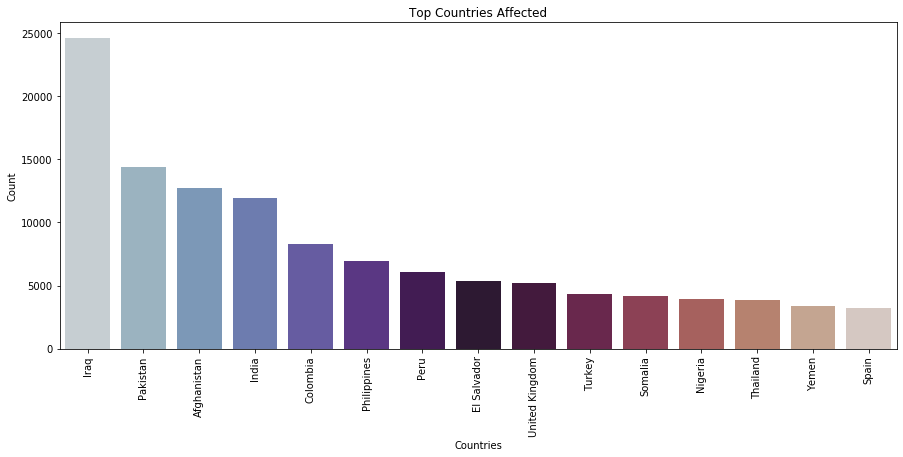

In [16]:
plt.subplots(figsize=(15,6))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values,palette='twilight')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

## Top 10 Most Used Attacktype

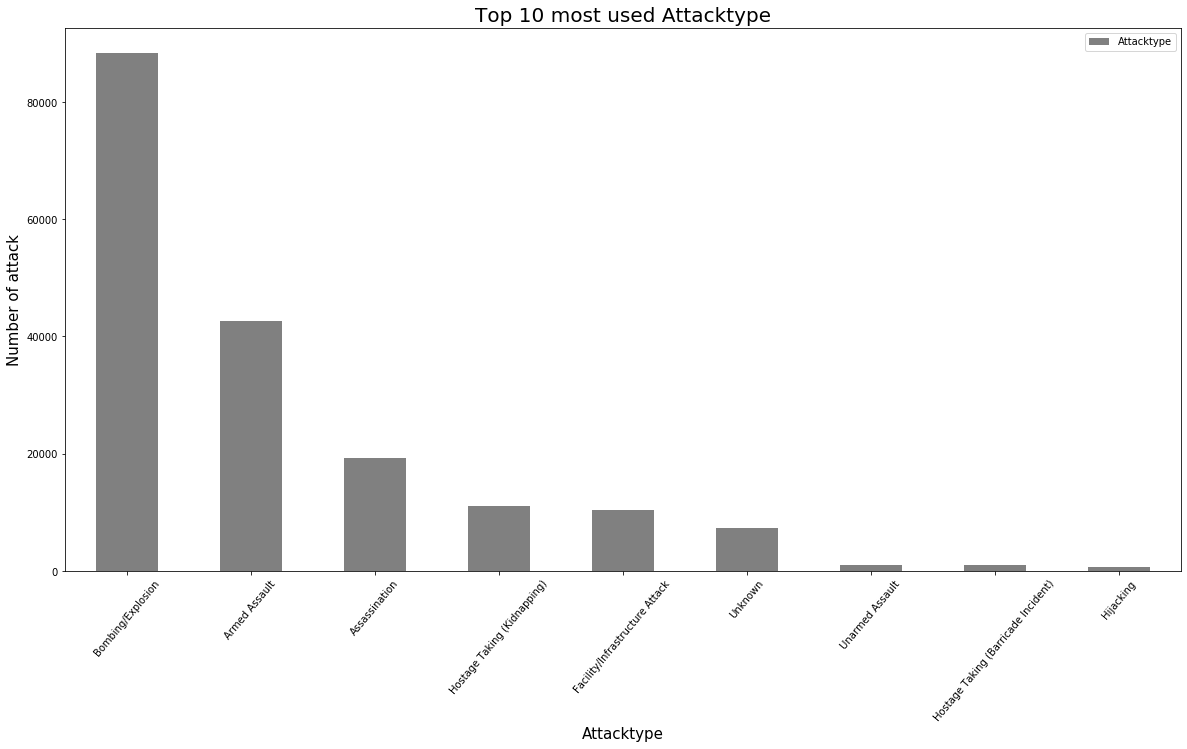

In [17]:
data['Attacktype'].value_counts().to_frame().sort_values('Attacktype',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='grey')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most used Attacktype",fontsize=20)
plt.show()

## Top 10 Most Attacked Targets

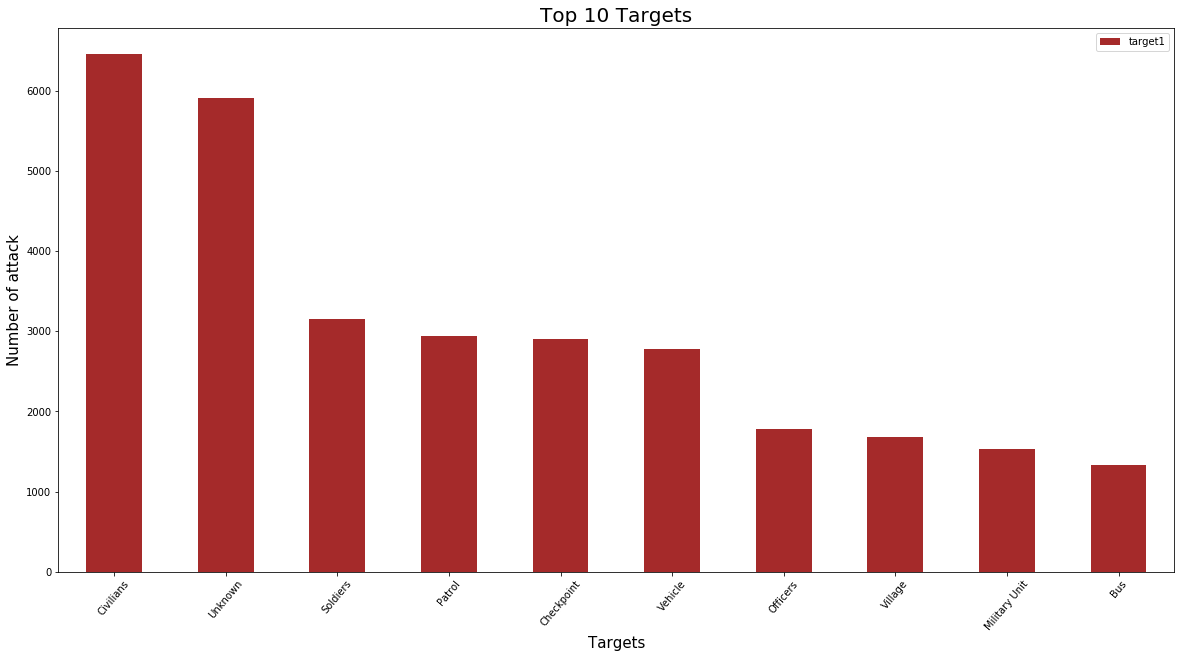

In [18]:
data['target1'].value_counts().to_frame().sort_values('target1',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='brown')
plt.xticks(rotation = 50)
plt.xlabel("Targets",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 Targets",fontsize=20)
plt.show()

## Most Attacked Regions and States

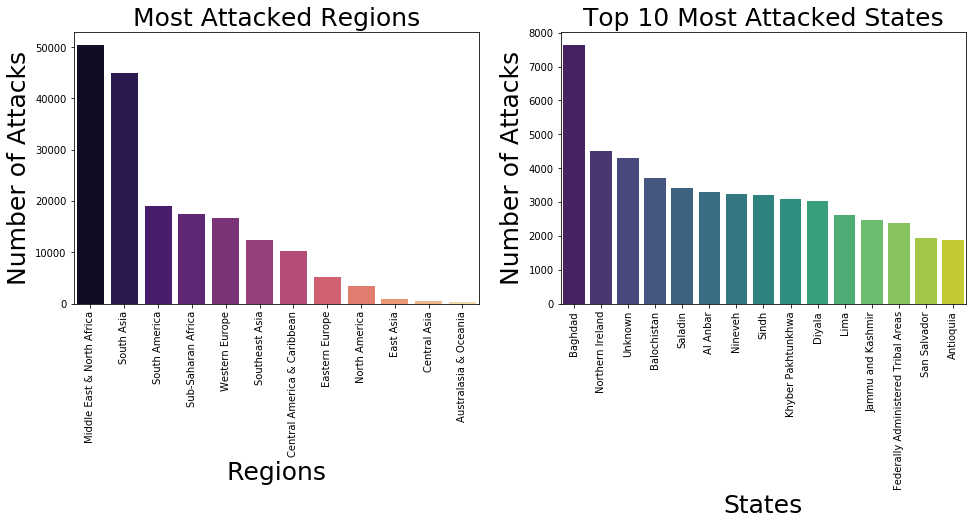

In [19]:
# most attacked regions
plt.subplot(1,2,1)
sns.barplot(data['Region'].value_counts().index, data['Region'].value_counts().values,palette='magma')
plt.title('Most Attacked Regions',fontsize=25)
plt.xlabel('Regions',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=25)
plt.xticks(rotation=90)

# most attacked states
plt.subplot(1,2,2)
sns.barplot(data['State'].value_counts().head(15).index, data['State'].value_counts().head(15).values,palette='viridis')
plt.title('Top 10 Most Attacked States',fontsize=25)
plt.xlabel('States',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=25)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(16, 5)

## Wounded and Killed People With Regions

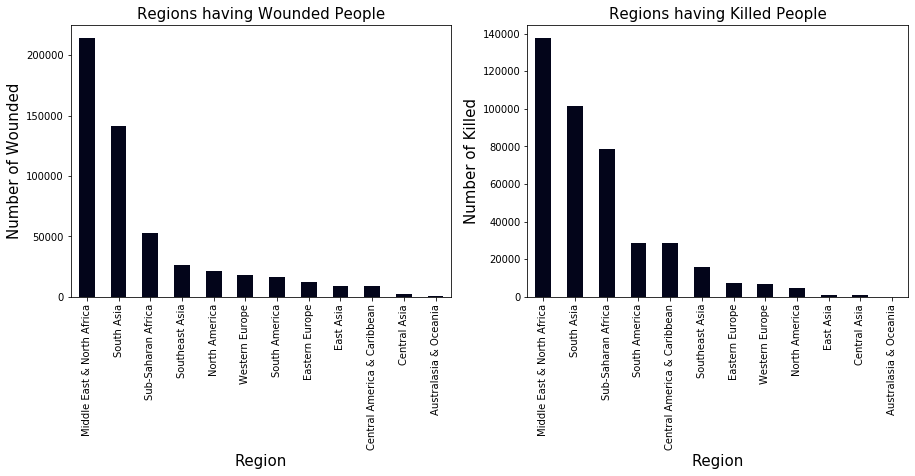

In [20]:
# regions having wounded people
plt.subplot(1,2,1)
data.groupby(['Region'])['Wound'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Wounded People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

# regions having killed people
plt.subplot(1,2,2)
data.groupby(['Region'])['kill'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Killed People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

In [21]:
terror_data = data.dropna(subset=['latitude','longitude'])

In [22]:
terror_data = terror_data.drop_duplicates(subset=['Country','Group'])

In [23]:
groups =terror_data.Group.value_counts()[1:20].index.tolist()

In [24]:
terror_data = terror_data.loc[terror_data.Group.isin(groups)]

In [25]:
terror_data.Group.unique()

array(['Popular Front for the Liberation of Palestine (PFLP)',
       'Palestinians', 'Right-wing extremists', 'Neo-Nazi extremists',
       'Black September',
       'Armenian Secret Army for the Liberation of Armenia',
       'Justice Commandos for the Armenian Genocide',
       'Abu Nidal Organization (ANO)', 'Left-Wing Terrorists',
       'Guerrillas', 'Muslim extremists', 'Separatists', 'Gunmen',
       'Hezbollah', 'Muslim Militants', "Kurdistan Workers' Party (PKK)",
       'Islamist extremists', 'Jihadi-inspired extremists',
       'Islamic State of Iraq and the Levant (ISIL)'], dtype=object)

## World Map Representation of terrorist organizations using folium

In [26]:
m = folium.Map(location=[10, 0], tiles="Stamen Terrain", zoom_start=2)
for i in range(10,len(terror_data)):
    folium.Marker([terror_data.iloc[i]['latitude'],terror_data.
iloc[i]['longitude']], 
                  popup='Group:{}<br>Country:{}'.format(terror_data.
iloc[i]['Group'], 
                  terror_data.iloc[i]['Country'])).add_to(m)

In [27]:
m

### Conclusion

Year With Most Attacks    : 2014

Country With Most Attacks : Iraq

Most Attack Type          : Bombing/Explosion

Most Attack Targets       : Civilians

Most Attack Region        : Middle East & North Africa

Most Attack States        : Baghdad

Region With Most Wounded
and Killed People         : Middle East & North Africa